python 之禅

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import math         # 简单数学可直接输入，但更为专业的数学需要导入math模块

math.log(1)

0.0

Black-Scholes-Merton到期指数水平

![Alt text](image-1.png)

In [2]:
import math
import numpy as np

# 定义模型并模拟参数值
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2
I = 100000

# 随机数生成器种子值固定
"""
随机数种子(random seed)在伪随机数生成器中用于生成伪随机数的初始数值。
对于一个伪随机数生成器，从相同的随机数种子出发，可以得到相同的随机数序列。随机数种子通常由当前计算机状态确定，如当前的时间。
"""
np.random.seed(1000)       

# 提取标准正态分布随机数
"""
从标准正态分布中获取随机样本，并使用此方法将随机样本作为numpy数组返回
"""
z = np.random.standard_normal(I)

# 模拟期末价值
ST = S0 * np.exp((r-sigma**2/2) * T +sigma * math.sqrt(T) * z)      # math.squr() 开根

# 计算期权到期收益
hT = np.maximum(ST-K, 0)

# 计算蒙特卡洛估算函数
C0 = math.exp(-r*T) * np.mean(hT)

print('Value of the European call option: {:5.3f}.'.format(C0))


Value of the European call option: 8.019.


In [3]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

plt.style.use('seaborn-v0_8-whitegrid')         # style.use('seaborn-whitegrid'),在python3.6版本以后会报错
mpl.rcParams['font.family'] = 'serif'           # 导入matplotlib 并配置Jupyter绘图样式和方法
%matplotlib inline

data = pd.read_csv(r'C:\Users\ORANGE\Desktop\文件\software\pyhton\Finace for python\file\tr_eikon_eod_data.csv')
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)                       # 删除Nan值
data.info()                                     # 显示关于数据集的一些辕信息

data['rets'] = np.log(data / data.shift(1)) 
    """    
    首先，data['rets'] = np.log(data / data.shift(1)) 这行代码是在计算数据的时间序列的对数收益率。
    data.shift(1)是将数据向下移动一个单位，然后data / data.shift(1)是当前值除以下一个值，最后np.log()函数计算这些结果的自然对数
    """  
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)
    """
    代码是在计算rets列的252个数据点的滚动标准差，即波动率（volatility）
    .rolling(252)函数创建了一个滚动窗口，然后.std()计算这个窗口中数据的标准差，最后np.sqrt(252)是将这个标准差值放大到252的平方根。
    """
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10,6))
    """
    绘制.SPX和vola两列数据的图形。subplots=True表示将绘制两个子图，figsize=(10,6)是设置图形的大小为10x6
    """

IndentationError: unexpected indent (2682358086.py, line 15)

In [18]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2

%timeit r = [f(x) for x in a]

"""
%time 的计算结果包括：CPU time(CPU运行程序的时间)， Wall time(Wall Clock Time，墙上挂钟的时间，也就是我们感受到的运行时间)。

%timeit 计时更为精确，这一命令会运行代码 r 次，每次 n 遍，再对 n*r 遍的结果取平均后，得到运行一遍代码的时间。
"""

1.31 s ± 84.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
import numpy as np

loops = 2500000
a = np.arange(1,loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

r = 3 * np.log(a) + np.cos(a) ** 2
r   # 直接生成一个np.array

array([ 0.29192658,  2.25261973,  4.27592201, ..., 44.72845654,
       45.13529923, 44.29622228])

In [30]:
import numexpr as ne            # NumExpr是一个用于numpy类型快速数值表达式计算的第三方Python加速库
import numpy as np

loops = 2500000
a = np.arange(1,loops)
ne.set_num_threads(1)           # 这个函数是用来设置并行计算线程的数量
                                # 在新版本的的多线程库中，这个函数可能不起作用或者根本就不存在。取而代之的是使用Python的concurrent.futures模块，或者其他并行计算库如joblib等
f = '3 * log(a) + cos(a) ** 2'
r = ne.evaluate(f)              # 先计算表达式结果，用来计算表达式f的值
%timeit ne.evaluate(f)

55 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
import numexpr as ne            # NumExpr是一个用于numpy类型快速数值表达式计算的第三方Python加速库
import numpy as np

loops = 2500000
a = np.arange(1,loops)
ne.set_num_threads(4)           # 这个函数是用来设置并行计算线程的数量
                                # 在新版本的的多线程库中，这个函数可能不起作用或者根本就不存在。取而代之的是使用Python的concurrent.futures模块，或者其他并行计算库如joblib等
f = '3 * log(a) + cos(a) ** 2'
r = ne.evaluate(f)              # 先计算表达式结果，用来计算表达式f的值
%timeit ne.evaluate(f)

18.7 ms ± 734 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
import eikon as ek

# from eikon import EikonAPI

# api = EikonAPI(access_token='your_token_here')

data = ek.get_timeseries('AAPL.O', fields='*', start_date='2023-09-22 16:00:00', end_date='2023-09-22 17:00:00', interval='tick')

data.info()         # 由于没有连接Eikon Data API 所以获取不到信息，得到的data是none
data.tail()

ImportError: cannot import name 'EikonAPI' from 'eikon' (d:\python 3.11\Lib\site-packages\eikon\__init__.py)

index_col：此参数用于设置要将哪一列或哪几列设置为数据帧的索引。默认值为None，这意味着不会将任何列设置为索引。如果设置为0，那么第一列（列0）将被设置为索引。如果你有一个特定的列你希望作为索引，你可以指定该列的名称或列的索引。例如，如果你有一个名为"date"的列，你可以通过将index_col="date"来将它设为索引。

parse_dates：此参数默认为False，意味着pandas不会尝试解析日期。如果设置为True，那么所有被认为可能是日期的列都会被尝试解析。如果你只希望解析特定的列，你可以将parse_dates设置为一个列的列表，例如parse_dates=["date"]，其中"date"是你希望被解析为日期的列的名称。

<Axes: xlabel='Date'>

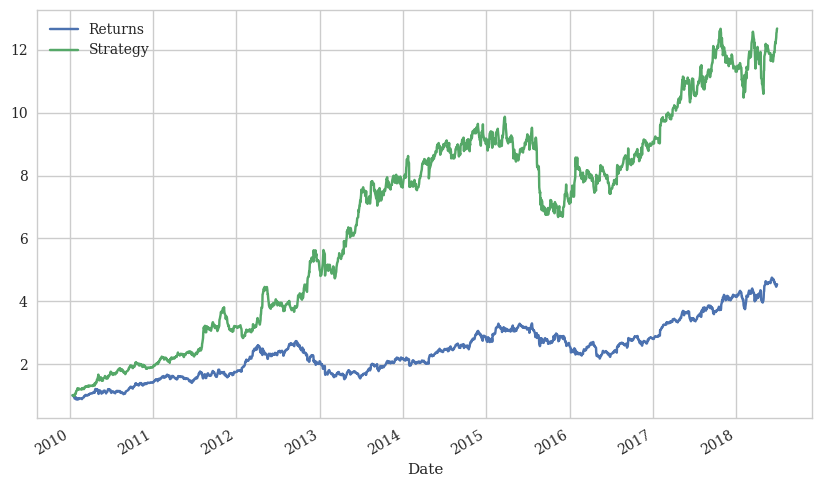

In [63]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

data = pd.read_csv(r'C:\Users\ORANGE\Desktop\文件\software\pyhton\Finace for python\file\tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
    # index_col=0, parse_dates=True意味着你希望将第一列设为索引，并尝试解析所有被认为是日期的列。
data = pd.DataFrame(data['AAPL.O'])         # 将data变成了一个DataFrame对象，这个对象中的数据来自data['AAPL.O']
data['Returns'] = np.log(data / data.shift())
    # """
    # data.shift() 是将 data 的索引向下移动一个位置，返回的是前一期的数据。
    # data / data.shift() 是将当前期的数据除以前一期的数据。这实际上是在计算连续复利收益率。
    # np.log() 是对连续复利收益率取对数，这通常用于金融数据分析，因为很多金融指标（例如股票价格）的对数收益率具有良好的统计性质。
    # """
data.dropna(inplace=True)

lags = 6
cols=[]
for lag in range(1,lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))         # np.sign 如果输入是零，返回0。如果输入是正数，返回1。如果输入是负数，返回-1。
    cols.append(col)
data.dropna(inplace=True)

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
     kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001,verbose=False)
data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

"""
这段代码是使用Python的Scikit-Learn库来进行一种称为支持向量机（Support Vector Machines, SVM）的机器学习。

首先，SVC(gamma='auto')是创建一个支持向量分类器的实例。这里的gamma='auto'是设置核函数的一个参数，它决定了数据在空间中的复杂度。
model.fit(data[cols], np.sign(data['Returns']))这一行是训练模型。data[cols]代表数据集中的某些列，np.sign(data['Returns'])则是数据的标签。这里需要注意的是，Returns列的值被转化为了符号（+1或-1），这是因为SVM通常用于二分类问题。

然后，model.predict(data[cols])是使用训练好的模型对数据集中的某些列进行预测，预测的结果存储在data['Prediction']中。

最后，data['Strategy'] = data['Prediction'] * data['Returns']和data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))这两行代码创建了一个策略列，这个策略列是预测值和实际值的符号的乘积（也就是预测结果和实际结果的相同或相反），然后对策略进行累加（cumsum），取自然对数（apply(np.exp)），并绘制了累积策略的图形。这种图形常常被用来评估分类器的性能。
所以，这段代码的主要意义在于使用支持向量机对数据进行二分类，并评估模型的性能。
"""